In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [19]:
class Ga:
    def __init__(self,NP=100,L=20,G=10,Pc=0.8,Pm=0.1,Xs=7,Xx=0,Ys=7,Yx=0,is_max=False) -> None:
        self.NP = NP # 种群数目
        self.L = L # 染色体编码长度
        self.G = G # 最大进化代数
        self.Pc= Pc # 交叉概率
        self.Pm = Pm # 变异概率 
        self.Xs = Xs # x边界
        self.Xx = Xx
        self.Ys = Ys # y边界
        self.Yx = Yx
        self.choose = []
        self.is_max = is_max # 是否求最大值
    # 定义目标函数
    def f(self,x,y):
        return x**2+y**2
        # return  x*x+y*y

    # 解码函数
    def decode(self,x,y):
        # 进行解码
        X = x.dot(2**np.arange(self.L)[::-1])/(2**self.L-1)*(self.Xs-self.Xx)+self.Xx
        Y = y.dot(2**np.arange(self.L)[::-1])/(2**self.L-1)*(self.Ys-self.Yx)+self.Yx
        return X,Y
    def generate_population(self):
        l = 2
        '''产生种群 已经编码好 0 1编码长度 L'''
        x = np.random.randint(2, size=(self.NP, self.L))
        y = np.random.randint(2, size=(self.NP, self.L))
        # return np.array([np.random.randint(2, size=(NP, L)) for i in range(l)])
        return x,y
    def fitness(self,x,y):
        re = self.f(x,y)
        # 由于结果可能为负值 但是再下面的选择阶段不允许出现负值，需要进行处理
        # 0值相当于概率0，所以需要加个非常小的正数
        if self.is_max: # 选最大值
            re = re - np.min(re) + 1e-5
        else:
            re = np.max(re) - re + 1e-5

        return re
    def select_population(self,x,y):
        x_ ,y_ =self.decode(x,y)
        result = self.fitness(x_,y_)
        # 挑选适应度高的个体 
        index = np.random.choice(np.arange(self.NP),replace=True,size=self.NP,p=result/result.sum())

        selected_x = x[index]
        selected_y = y[index]
        self.choose.append(self.decode(selected_x,selected_y))
        return selected_x,selected_y
    def cross_mutation(self,x,y):
        father = []

        father.extend(x)
        father.extend(y)
        children = []
        for i in father:
            child = i
            # 交叉操作
            if np.random.rand() < self.Pc:
                
                # 产生随机交叉点
                point = np.random.randint(self.L)
                # 选取母节点
                # print(point)
                child[point:] = i[point:]
            # 变异操作
            if np.random.rand() < self.Pm:
                point = np.random.randint(self.L)
                child[point]^=1 # 取反
            children.append(child)
        return np.array(children[:len(children)//2]),np.array(children[len(children)//2:])

    def population_iteration(self):
        self.process = []
        x,y = self.generate_population()
        # x , y= decode(x,y)
        for i in range(self.G):
            pre_x,pre_y = x , y
            x,y = self.select_population(x,y)
            x,y = self.cross_mutation(x,y)
            
            a,b =self.decode(x,y)
            self.process.append(self.f(a,b).sum())

        self.x ,self.y= self.decode(x,y)
        self.plot_3d()
        self.plot_coss()
    def plot_3d(self):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        X = np.linspace(self.Xs,self.Xx,100)
        Y = np.linspace(self.Ys,self.Yx,100)
        X,Y = np.meshgrid(X, Y)
        Z = self.f(X, Y)
        ax.plot_surface(X,Y,Z,rstride=1, cstride=1, cmap='rainbow')
        # ax.set_zlim(-10,10)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.scatter(self.x,self.y,self.f(self.x,self.y),c='black')
        plt.title("result")
        plt.show()
    def plot_coss(self):
        plt.plot(range(len(self.process)),self.process)
        plt.title("Total Population Values")
        plt.show()  


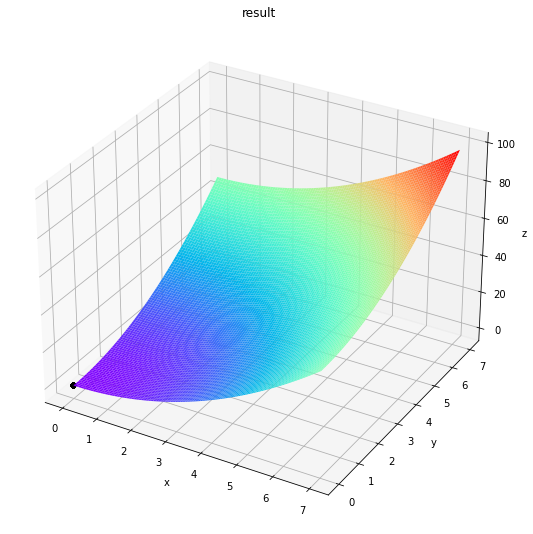

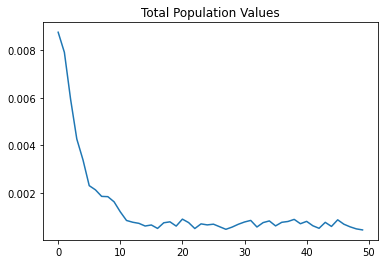

In [24]:
temp = Ga(L=40,G=50)
temp.population_iteration()

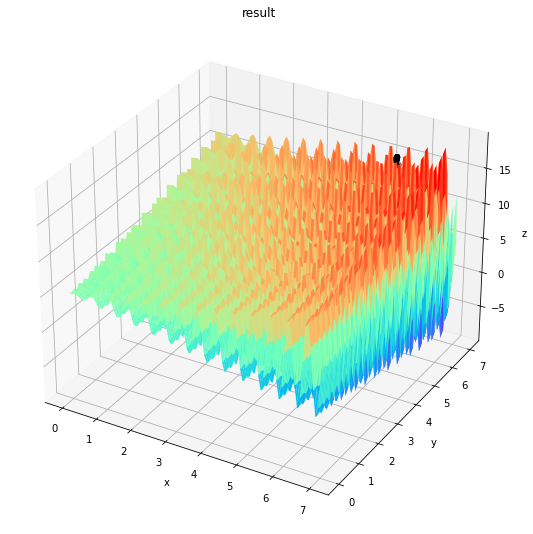

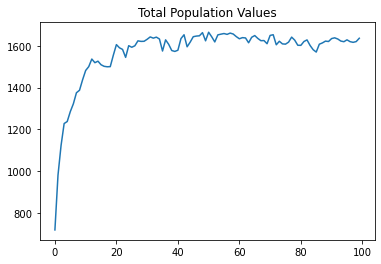

In [30]:
def F(x,y):
    return 5+x*np.sin(4*np.pi*x)+y*np.sin(20*np.pi*y)
temp = Ga(L=30,G=100,is_max=True)
temp.f = F
temp.population_iteration()

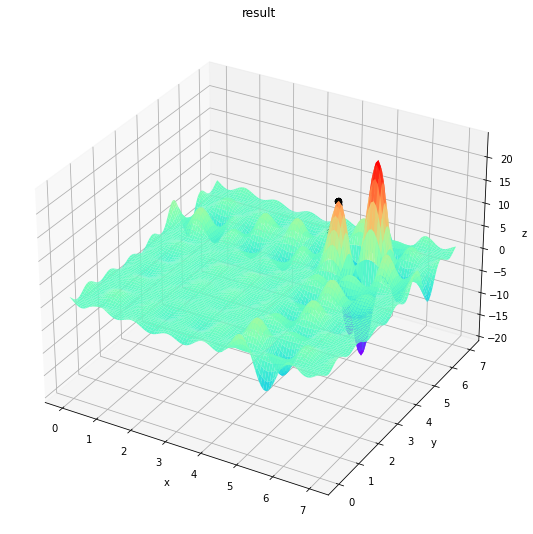

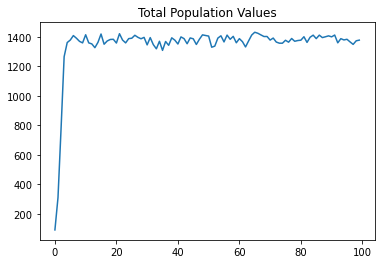

In [120]:
def F(x,y):
    r = []
    for j in range(len(x)):
        a = 0
        b = 0
        for i in range(1,6):
            a+=(np.cos((i+1)*x[j]+i))
            b+=(np.cos((i+1)*y[j]+i))
        r.append(a*b)
    return np.array(r)
temp = Ga(L=30,G=100,is_max=True)
temp.f = F
temp.population_iteration()

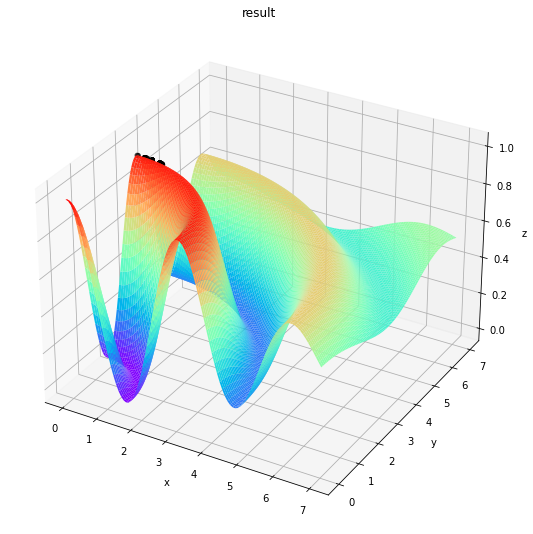

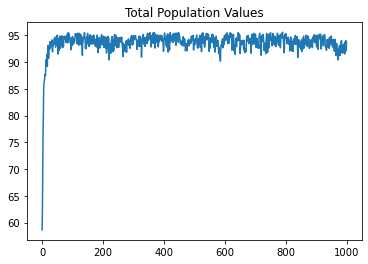

In [4]:
def F(x,y):
    return 0.5 - (np.sin(np.sqrt(x**2+y**2))**2 - 0.5)/(1 + 0.001*(x**2 + y**2)**2)
temp = Ga(L=30,G=1000,is_max=True)
temp.f = F
temp.population_iteration()

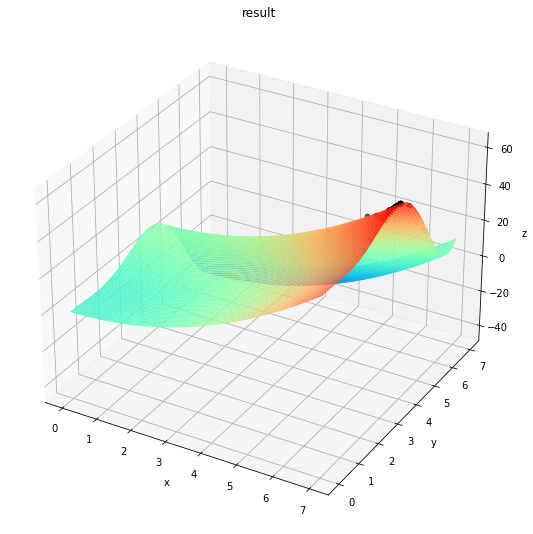

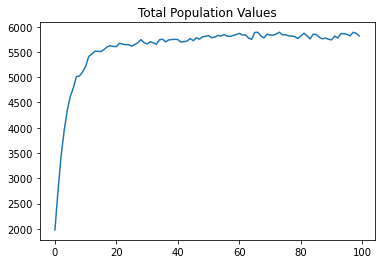

In [9]:
def F(x,y):
    return x**2-y**2*np.cos(y)
temp = Ga(L=30,G=100,is_max=True)
temp.f = F
temp.population_iteration()

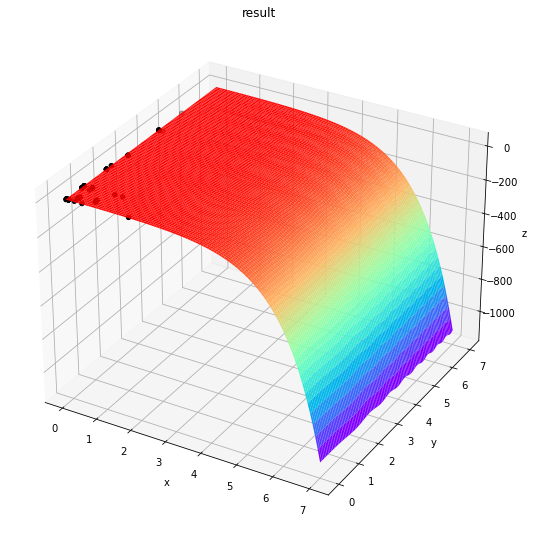

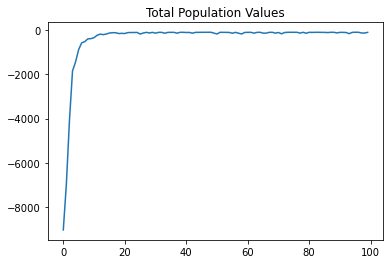

In [12]:
def F(x,y):
    return x*np.cos(y**2)-np.exp(x)
temp = Ga(L=30,G=100,is_max=True)
temp.f = F
temp.population_iteration()